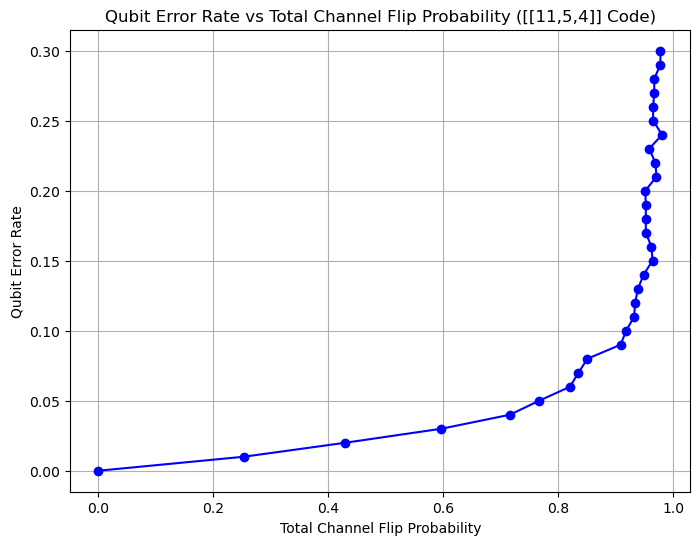

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, pauli_error

def create_bacon_shor_code_circuit():
    qc = QuantumCircuit(11, 11)

    # Initialize logical |0> state
    for i in range(5):
        qc.h(i)

    # Encoding with Bacon-Shor code (simplified for example purposes)
    for i in range(5):
        qc.cx(i, i + 5)
        qc.cx(i, i + 6)

    qc.barrier()
    return qc

def add_bit_flip_error(error_prob):
    noise_model = NoiseModel()
    bit_flip = pauli_error([('X', error_prob), ('I', 1 - error_prob)])
    # Add bit-flip error to single-qubit gates
    noise_model.add_all_qubit_quantum_error(bit_flip, ['u1', 'u2', 'u3', 'id'])
    # Add bit-flip error to two-qubit gates
    two_qubit_bit_flip = bit_flip.tensor(bit_flip)
    noise_model.add_all_qubit_quantum_error(two_qubit_bit_flip, ['cx'])
    return noise_model

def measure_and_decode(qc):
    qc.barrier()
    # Decoding for Bacon-Shor code (simplified example)
    for i in range(5):
        qc.cx(i, i + 5)
        qc.cx(i, i + 6)
    
    # Measure the qubits
    qc.measure(range(11), range(11))

def simulate_and_compute_error(qc, noise_model, shots=1024):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, noise_model=noise_model, shots=shots)
    result = job.result()
    counts = result.get_counts()
    error_count = 0
    for outcome in counts:
        if outcome[:5] != '0' * 5:
            error_count += counts[outcome]
    total_count = sum(counts.values())
    error_probability = error_count / total_count
    return error_probability

# Parameters
error_probabilities = np.linspace(0, 0.3, 31)  # Qubit error rates from 0 to 0.3
total_channel_flip_probs = []

# Create the quantum circuit for the [[11,5,4]] code
qc = create_bacon_shor_code_circuit()

# Simulate for each error probability
for error_prob in error_probabilities:
    noise_model = add_bit_flip_error(error_prob)
    qc_copy = qc.copy()
    measure_and_decode(qc_copy)
    error_probability = simulate_and_compute_error(qc_copy, noise_model)
    total_channel_flip_probs.append(error_probability)

# Plotting the results with TCFP on the x-axis
plt.figure(figsize=(8, 6))
plt.plot(total_channel_flip_probs, error_probabilities, marker='o', linestyle='-', color='b')
plt.title('Qubit Error Rate vs Total Channel Flip Probability ([[11,5,4]] Code)')
plt.xlabel('Total Channel Flip Probability')
plt.ylabel('Qubit Error Rate')
plt.grid(True)
plt.show()
